# 17 - Shots allowed and taken per goal per 90

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.transforms import ScaledTranslation

from PIL import Image
import urllib
import os

In [90]:
# Read CSV as DataFrame called airline_bumping
liga = pd.read_csv("/Users/ligandrosy/Downloads/dta2.csv")


# Data Preprocessing

In [91]:
liga

,Team,Goals,Shots pg,Goals Conceded,Shots Conceded pg,P
0,Manchester City,23,16.9,6,5.7,7
1,Arsenal,20,17.3,8,7.4,8
2,Newcastle,12,15.9,8,13.1,8
3,Tottenham,19,14.4,10,15.9,7
4,Liverpool,18,18.9,9,8.4,8
5,Everton,7,12.0,7,16.6,7
6,Brighton,14,12.6,8,10.7,8
7,Chelsea,10,11.9,10,9.9,8
8,Manchester United,8,12.5,8,14.7,7
9,Leeds,10,13.0,10,12.8,6


In [92]:
liga["Shots conceded"] = liga["Shots Conceded pg"] * liga["P"]
liga["Shots taken"] = liga["Shots pg"] * liga["P"]

In [93]:
liga

,Team,Goals,Shots pg,Goals Conceded,Shots Conceded pg,P,Shots conceded,Shots taken
0,Manchester City,23,16.9,6,5.7,7,39.9,118.3
1,Arsenal,20,17.3,8,7.4,8,59.2,138.4
2,Newcastle,12,15.9,8,13.1,8,104.8,127.2
3,Tottenham,19,14.4,10,15.9,7,111.3,100.8
4,Liverpool,18,18.9,9,8.4,8,67.2,151.2
5,Everton,7,12.0,7,16.6,7,116.2,84.0
6,Brighton,14,12.6,8,10.7,8,85.6,100.8
7,Chelsea,10,11.9,10,9.9,8,79.2,95.2
8,Manchester United,8,12.5,8,14.7,7,102.9,87.5
9,Leeds,10,13.0,10,12.8,6,76.8,78.0


In [94]:
liga["Shots conceded"] = liga["Shots conceded"].round(decimals=0)
liga["Shots taken"] =liga["Shots taken"].round(decimals=0)

In [95]:
liga

,Team,Goals,Shots pg,Goals Conceded,Shots Conceded pg,P,Shots conceded,Shots taken
0,Manchester City,23,16.9,6,5.7,7,40.0,118.0
1,Arsenal,20,17.3,8,7.4,8,59.0,138.0
2,Newcastle,12,15.9,8,13.1,8,105.0,127.0
3,Tottenham,19,14.4,10,15.9,7,111.0,101.0
4,Liverpool,18,18.9,9,8.4,8,67.0,151.0
5,Everton,7,12.0,7,16.6,7,116.0,84.0
6,Brighton,14,12.6,8,10.7,8,86.0,101.0
7,Chelsea,10,11.9,10,9.9,8,79.0,95.0
8,Manchester United,8,12.5,8,14.7,7,103.0,88.0
9,Leeds,10,13.0,10,12.8,6,77.0,78.0


In [96]:
del liga["Shots pg"]

In [97]:
del liga["Shots Conceded pg"]

In [98]:
liga

,Team,Goals,Goals Conceded,P,Shots conceded,Shots taken
0,Manchester City,23,6,7,40.0,118.0
1,Arsenal,20,8,8,59.0,138.0
2,Newcastle,12,8,8,105.0,127.0
3,Tottenham,19,10,7,111.0,101.0
4,Liverpool,18,9,8,67.0,151.0
5,Everton,7,7,7,116.0,84.0
6,Brighton,14,8,8,86.0,101.0
7,Chelsea,10,10,8,79.0,95.0
8,Manchester United,8,8,7,103.0,88.0
9,Leeds,10,10,6,77.0,78.0


In [99]:
liga["Shots allowed pgA"] = liga["Shots conceded"]/liga["Goals Conceded"]
liga["Shots taken pgF"] = liga["Shots taken"]/liga["Goals"]

In [100]:
liga

,Team,Goals,Goals Conceded,P,Shots conceded,Shots taken,Shots allowed pgA,Shots taken pgF
0,Manchester City,23,6,7,40.0,118.0,6.666667,5.130435
1,Arsenal,20,8,8,59.0,138.0,7.375000,6.900000
2,Newcastle,12,8,8,105.0,127.0,13.125000,10.583333
3,Tottenham,19,10,7,111.0,101.0,11.100000,5.315789
4,Liverpool,18,9,8,67.0,151.0,7.444444,8.388889
5,Everton,7,7,7,116.0,84.0,16.571429,12.000000
6,Brighton,14,8,8,86.0,101.0,10.750000,7.214286
7,Chelsea,10,10,8,79.0,95.0,7.900000,9.500000
8,Manchester United,8,8,7,103.0,88.0,12.875000,11.000000
9,Leeds,10,10,6,77.0,78.0,7.700000,7.800000


In [101]:
liga["index"] = [i for i in range(1,21)]
liga.set_index("index")

,Team,Goals,Goals Conceded,P,Shots conceded,Shots taken,Shots allowed pgA,Shots taken pgF
index,,,,,,,,
1,Manchester City,23,6,7,40.0,118.0,6.666667,5.130435
2,Arsenal,20,8,8,59.0,138.0,7.375000,6.900000
3,Newcastle,12,8,8,105.0,127.0,13.125000,10.583333
4,Tottenham,19,10,7,111.0,101.0,11.100000,5.315789
5,Liverpool,18,9,8,67.0,151.0,7.444444,8.388889
6,Everton,7,7,7,116.0,84.0,16.571429,12.000000
7,Brighton,14,8,8,86.0,101.0,10.750000,7.214286
8,Chelsea,10,10,8,79.0,95.0,7.900000,9.500000
9,Manchester United,8,8,7,103.0,88.0,12.875000,11.000000


In [102]:
liga['Team'] =liga['Team'].astype('string')

In [103]:
liga["Team"]

0        Manchester City
1                Arsenal
2              Newcastle
3              Tottenham
4              Liverpool
5                Everton
6               Brighton
7                Chelsea
8      Manchester United
9                  Leeds
10             Brentford
11           Southampton
12                Fulham
13         Wolverhampton
14        Crystal Palace
15              West Ham
16           Aston Villa
17           Bournemouth
18             Leicester
19     Nottingham Forest
Name: Team, dtype: string

# Logos function

In [104]:
codes = { "Liverpool" :8650,"Manchester City":8456,"Arsenal" :9825, "Tottenham" :  8586, "Brighton" :10204,
                      "Leeds" :8463,
                     "Chelsea" :8455,
                  "Brentford" :9937,
           "Newcastle" :10261,
                     "Fulham" :9879, "Crystal Palace" :9826,
          "Manchester United" :10260,
                     "Everton" :8668,
                 "Southampton":8466,
                 "Aston Villa" :10252,
          "Nottingham Forest":10203,
   "Wolverhampton":8602,
                    "West Ham" :8654,
                   "Leicester" : 8197,
               "Bournemouth" :8678}

In [105]:
def ax_logo(team_id, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png'))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

In [113]:
for x in (liga["Team"]):
    if x in [" Arsenal"," Leeds"," Southampton"," Nottingham Forest"]:
        x = x[1:]
        print(x)

Arsenal
Leeds
Southampton
Nottingham Forest


In [117]:
for x in (liga["Team"]):
    print(x)

Manchester City
 Arsenal
Newcastle
Tottenham
Liverpool
Everton
Brighton
Chelsea
Manchester United
 Leeds
Brentford
 Southampton
Fulham
Wolverhampton
Crystal Palace
West Ham
Aston Villa
Bournemouth
Leicester
 Nottingham Forest


### Error due to names

In [118]:
liga.at[1,'Team']='Arsenal'

In [119]:
for x in (liga["Team"]):
    print(x)

Manchester City
Arsenal
Newcastle
Tottenham
Liverpool
Everton
Brighton
Chelsea
Manchester United
 Leeds
Brentford
 Southampton
Fulham
Wolverhampton
Crystal Palace
West Ham
Aston Villa
Bournemouth
Leicester
 Nottingham Forest


## Code is working

In [121]:
liga.at[9,'Team']='Leeds'
liga.at[11,'Team']='Southampton'
liga.at[19,'Team']='Nottingham Forest'

In [122]:
clubs = []
for x in (liga["Team"]):
    if x in codes:
        clubs.append(codes[x])

In [123]:
clubs

[8456,
 9825,
 10261,
 8586,
 8650,
 8668,
 10204,
 8455,
 10260,
 8463,
 9937,
 8466,
 9879,
 8602,
 9826,
 8654,
 10252,
 8678,
 8197,
 10203]

In [124]:
len(clubs)

20

# Plotting

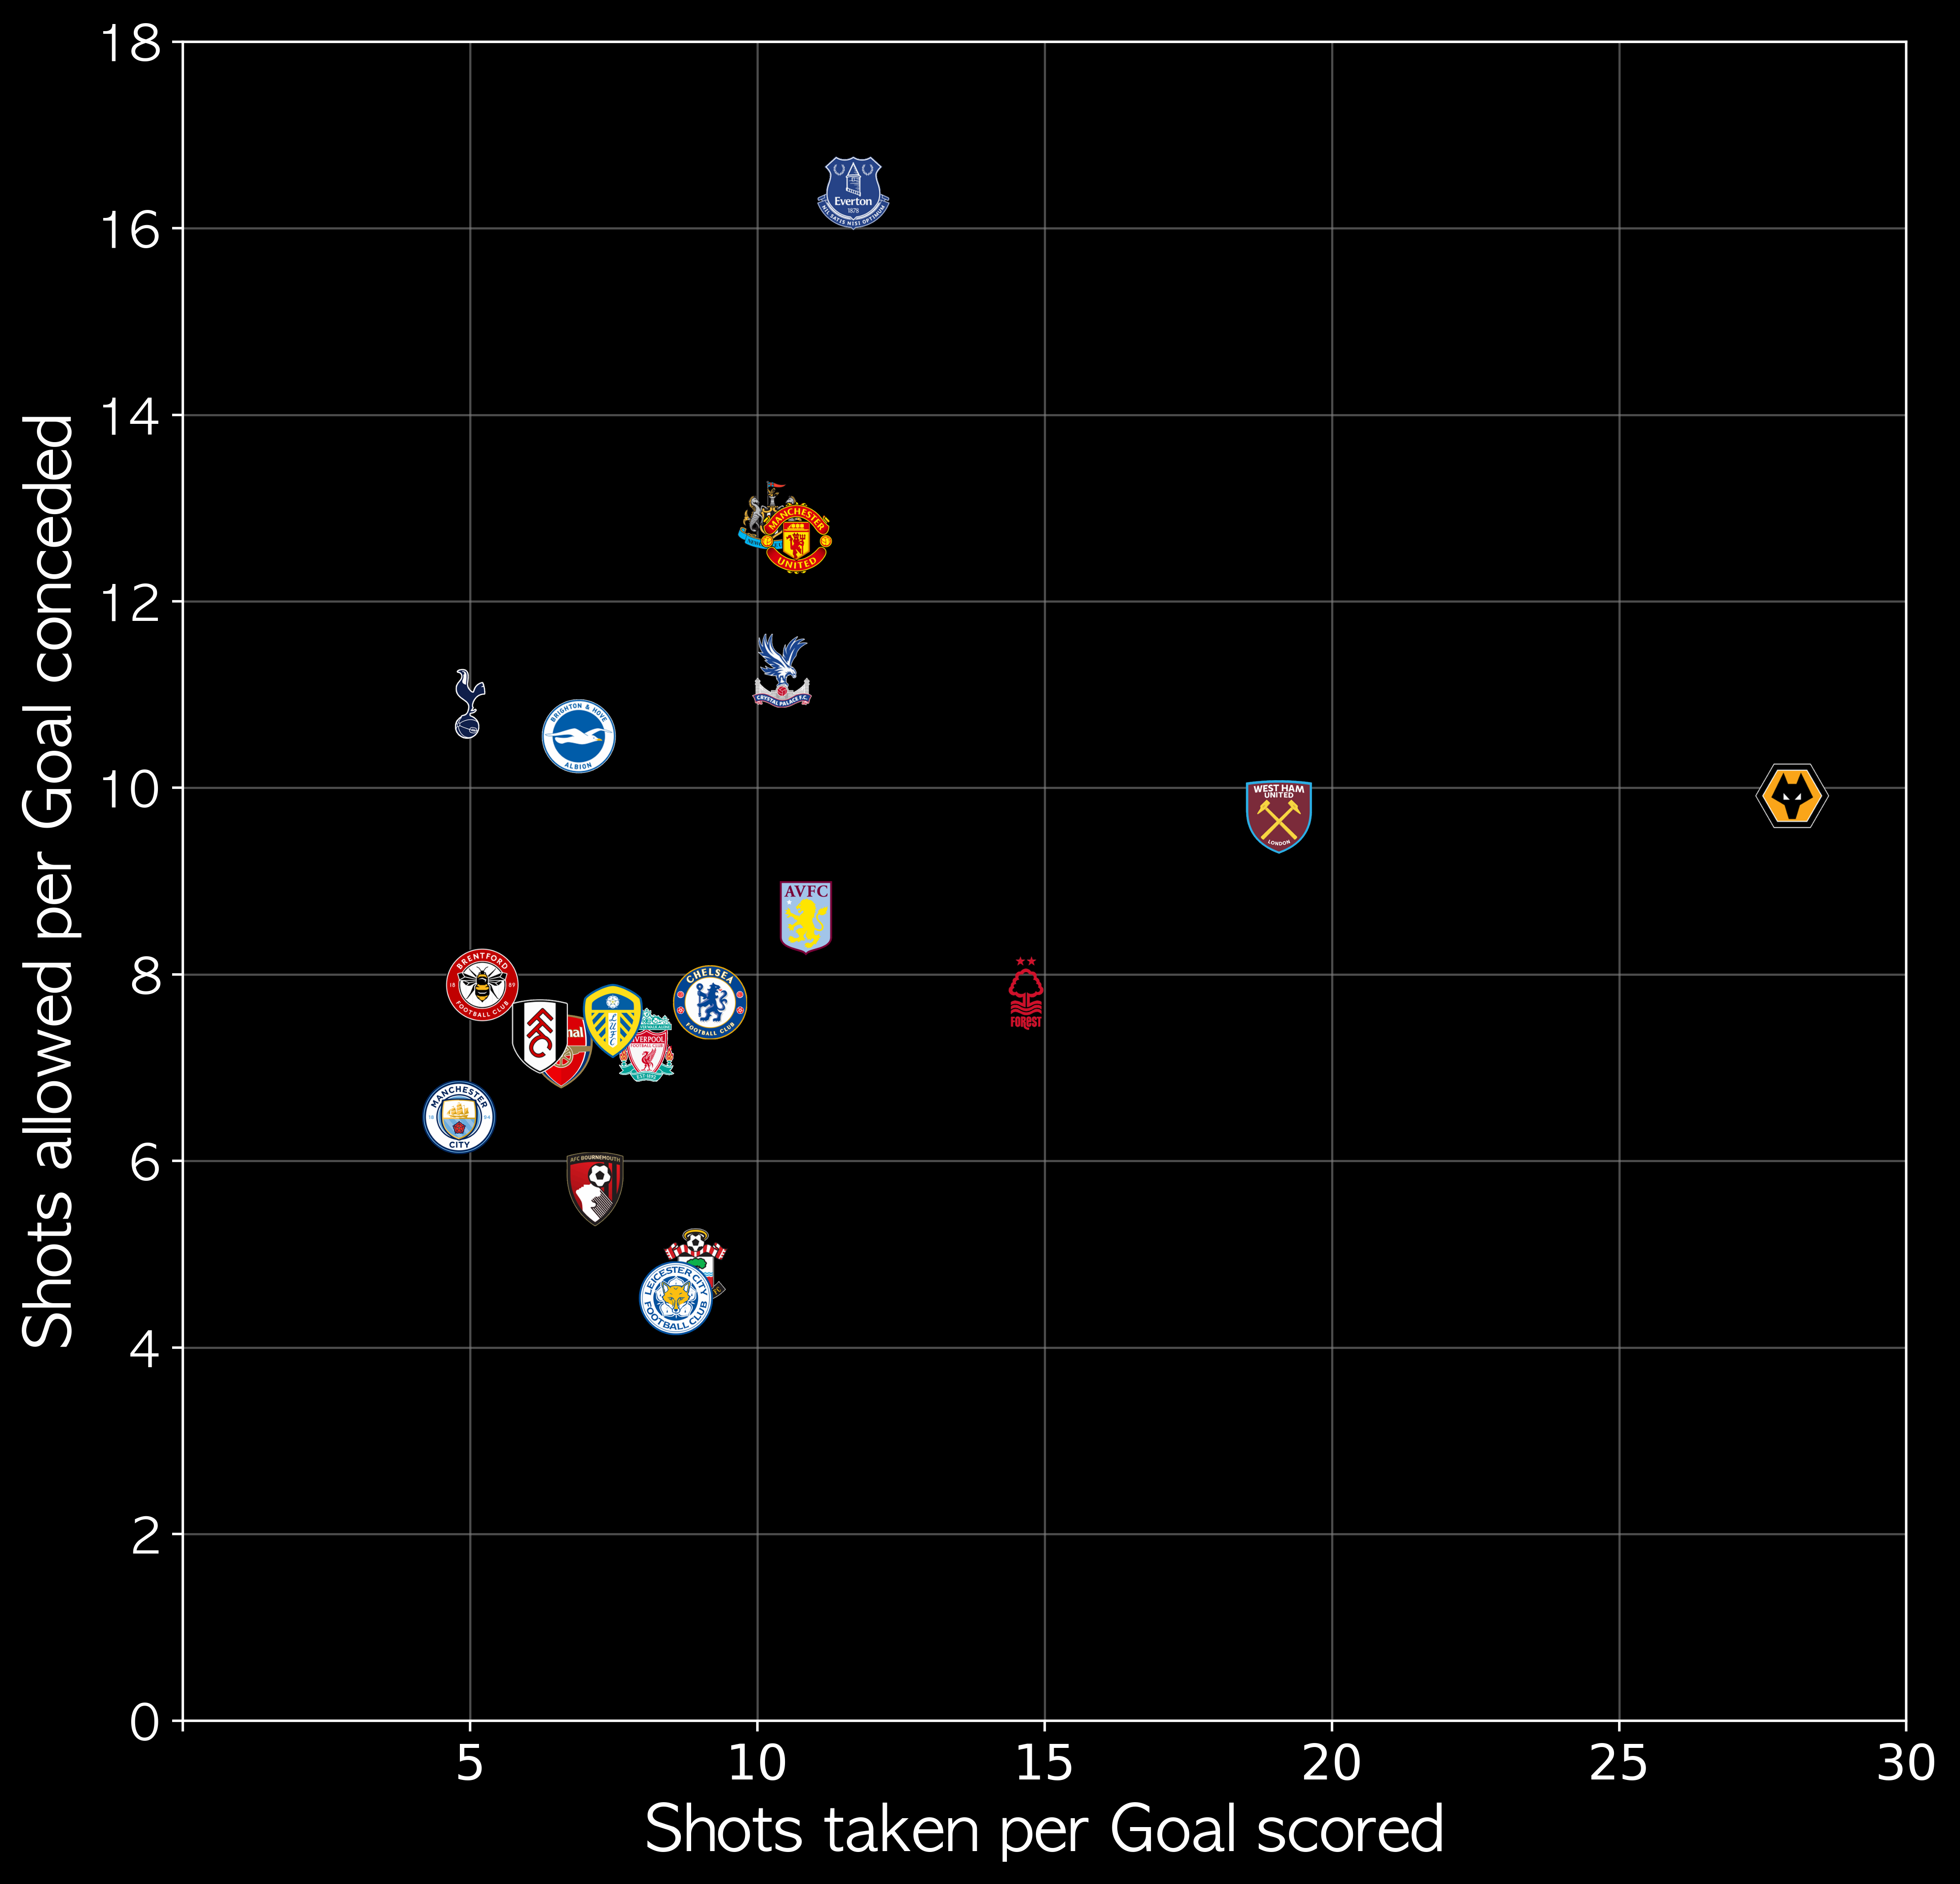

In [173]:
fig = plt.figure(figsize=(10,10), dpi=500)
ax = plt.subplot()

ax.set_ylim(0,18)
ax.set_xlim(0,30)


fig.set_facecolor('black')
ax.patch.set_facecolor('black')
    



#changing colors
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')


xticks = ax.xaxis.get_major_ticks() 
xticks[0].label1.set_visible(False)


# Add spines
ax.spines["top"].set_color('white')   
ax.spines["right"].set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')



ax_size = 0.05
# Draw grid lines with red color and dashed style
plt.grid(color='grey', linestyle='-', linewidth=0.7,alpha=0.6)

plt.xlabel("Shots taken per Goal scored",font ='AppleGothic',fontsize = 20,color="white")
plt.ylabel("Shots allowed per Goal conceded",font ='AppleGothic',fontsize = 20,color= "white")
ax.tick_params(labelsize=16)

#Change font of tick labels
plt.yticks(fontname = "AppleGothic")

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))




#add logos
counter = 0
for x,y in zip( liga["Shots taken pgF"],liga["Shots allowed pgA"],):
    ax_coords = DC_to_NFC((x,y))
    image_ax = fig.add_axes(
        [ax_coords[0] - ax_size/2, ax_coords[1] - ax_size/2, ax_size/1.5, ax_size/1.5],
         fc='None'
    )
    ax_logo(clubs[counter], image_ax)
    counter += 1

fig.savefig("AFC VS ARS.jpg")